In [1]:
import torch
import h5py
import numpy as np
import random
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

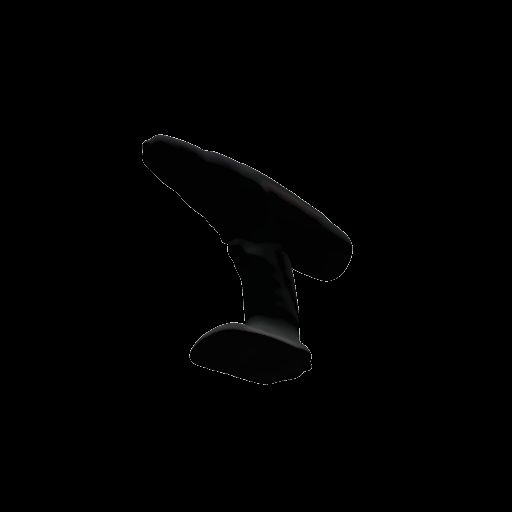

In [51]:
folder = "samples_new/obj_8"

idx = 89
image_path = os.path.join(folder, f"image_{idx}.png")

image = np.array(Image.open(image_path))
mask = np.where(image < 255, 1, 0)

image = image.astype(np.float32) / 255.
bg_color = np.ones(3).astype(np.float32) * random.choice([0.0, 0.5, 1.0])

img = image * mask + (1 - mask) * bg_color
img = (img * 255.).astype(np.uint8)

# image_masked = (mask).astype(np.uint8)

Image.fromarray(img)

In [5]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.backends.cudnn.version())

2.1.2+cu121
12.1
True
8902


In [6]:
# data_root = "/mnt/hdd/lara_data/dataset/Co3D/co3d_hydrant.h5"
data_root = "/mnt/hdd/lara_data/dataset/Co3D/co3d_teddybear.h5"
metas = h5py.File(data_root, 'r')
metas

<HDF5 file "co3d_teddybear.h5" (mode r)>

In [7]:
metas.keys()

<KeysViewHDF5 ['118_13848_27594', 'splits']>

In [8]:
metas['splits']['test']

<HDF5 dataset "test": shape (1,), type "|O">

In [9]:
scenes_name = np.array(sorted(metas.keys()))
scenes_name

array(['118_13848_27594', 'splits'], dtype='<U15')

In [10]:
i_test = np.arange(len(scenes_name))[::10][:3000000]
i_train = np.array([i for i in np.arange(len(scenes_name)) if
                (i not in i_test)])[:3000000]
scenes_name = scenes_name[i_train]

i_test, i_train, scenes_name

(array([0]), array([1]), array(['splits'], dtype='<U15'))

In [11]:
scenes_name = metas['splits']['test'][:].astype(str)
scenes_name

array(['118_13848_27594'], dtype='<U15')

In [12]:
scene_name = scenes_name[0]
scene_info = metas[scene_name]

scene_info['groups'].keys()

<KeysViewHDF5 ['groups_2_0', 'groups_2_1', 'groups_3_0', 'groups_3_1', 'groups_3_2', 'groups_4_0', 'groups_4_1', 'groups_4_2', 'groups_4_3', 'groups_5_0', 'groups_5_1', 'groups_5_2', 'groups_5_3', 'groups_5_4', 'groups_6_0', 'groups_6_1', 'groups_6_2', 'groups_6_3', 'groups_6_4', 'groups_6_5']>

In [15]:
scene_info.keys()

c2ws = []
for i in range(0, 197, 10):
    # c2ws.append(np.array(scene_info[f'c2w_{i}']))
    print(np.array(scene_info[f'c2w_{i}']))

[[-0.63133014 -0.68338842  0.36661016 -1.00388546]
 [-0.02378644 -0.45544538 -0.88994603  1.82202163]
 [ 0.77514971 -0.5705701   0.27128102 -0.55670311]
 [ 0.          0.          0.          1.        ]]
[[-0.43245725 -0.76913978  0.47053714 -1.27924673]
 [-0.08956273 -0.48263534 -0.8712301   1.81592648]
 [ 0.89719551 -0.4189124   0.13983288 -0.31765314]
 [ 0.          0.          0.          1.        ]]
[[-0.149748   -0.83234295  0.53364886 -1.33404357]
 [-0.1156737  -0.52127969 -0.84551001  1.78523277]
 [ 0.9819347  -0.18834262 -0.01821962  0.09859481]
 [ 0.          0.          0.          1.        ]]
[[ 0.26567609 -0.82097322  0.5053905  -1.1550744 ]
 [-0.14682838 -0.55257157 -0.8204305   1.74340358]
 [ 0.95281596  0.14376309 -0.26734725  0.66623578]
 [ 0.          0.          0.          1.        ]]
[[ 0.64831592 -0.65207355  0.39304842 -0.96943104]
 [-0.11507603 -0.59422837 -0.79602169  1.78606874]
 [ 0.7526251   0.47084304 -0.46028572  1.04021793]
 [ 0.          0.          

In [19]:
c2ws = []
for i in range(197):
    c2ws.append(np.array(scene_info[f'c2w_{i}']))
    
np.save("c2ws.npy", np.array(c2ws))
    

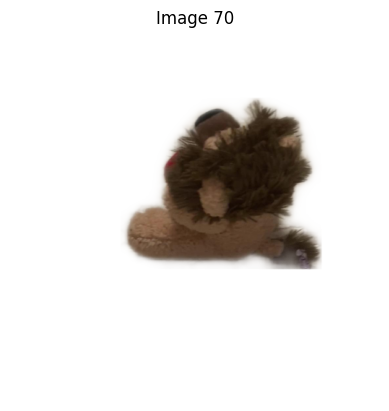

In [24]:
for i in range(197):
    if i == 70:
        rgb = np.array(scene_info[f'image_{i}'])
        image = Image.fromarray(rgb)
        
        plt.figure()
        plt.imshow(image)
        plt.title(f'Image {i}')
        plt.axis('off')
        plt.show()

In [22]:
rgb = Image.open("samples/obj_8/image_2.png")
rgb = np.array(rgb)
rgb.shape

(512, 512, 3)

In [17]:
random.sample(sorted(scene_info['groups']['groups_4_0']), k=25)

[110,
 100,
 127,
 99,
 131,
 133,
 103,
 111,
 126,
 122,
 93,
 109,
 112,
 105,
 128,
 136,
 121,
 102,
 135,
 118,
 106,
 140,
 132,
 139,
 125]

In [11]:
len(sorted(scene_info['groups']['groups_4_0']))

49

In [11]:
scene_info.keys()

c2ws = []
for i in range(197):
    c2ws.append(np.array(scene_info[f'c2w_{i}']))
    
# np.save("c2ws.npy", np.array(c2ws))

In [19]:
np.linalg.inv(np.array(scene_info['c2w_104']))

array([[ 0.40031341, -0.0691482 , -0.91376531, -0.29435843],
       [ 0.67359626, -0.65386081,  0.34457737,  0.099696  ],
       [-0.62130249, -0.75344825, -0.21517126,  1.87430227],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [14]:
n_group = 4

random.seed(46)
src_view_id = [random.choices(scene_info['groups'][f'groups_{n_group}_{i}'])[0] for i in range(n_group)]
random.seed(92)
view_id = src_view_id + [random.choices(scene_info['groups'][f'groups_{n_group}_{i}'])[0] for i in range(n_group)]
random.seed(None)

src_view_id, view_id

([136, 63, 174, 37], [136, 63, 174, 37, 113, 71, 172, 25])

In [25]:
random.choices(scene_info['groups'][f'groups_{n_group}_{0}'][1:])[0]

108

In [18]:
n_image = 196

view_id = []
for i in range(n_group): # torch.randperm(n_group).tolist():
    view_id += sorted(scene_info['groups'][f'groups_{n_group}_{i}'])

view_id[:35]

[93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]